In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Dropping Unnamed Column, as it has no significance with our analysis

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

<BarContainer object of 1517 artists>

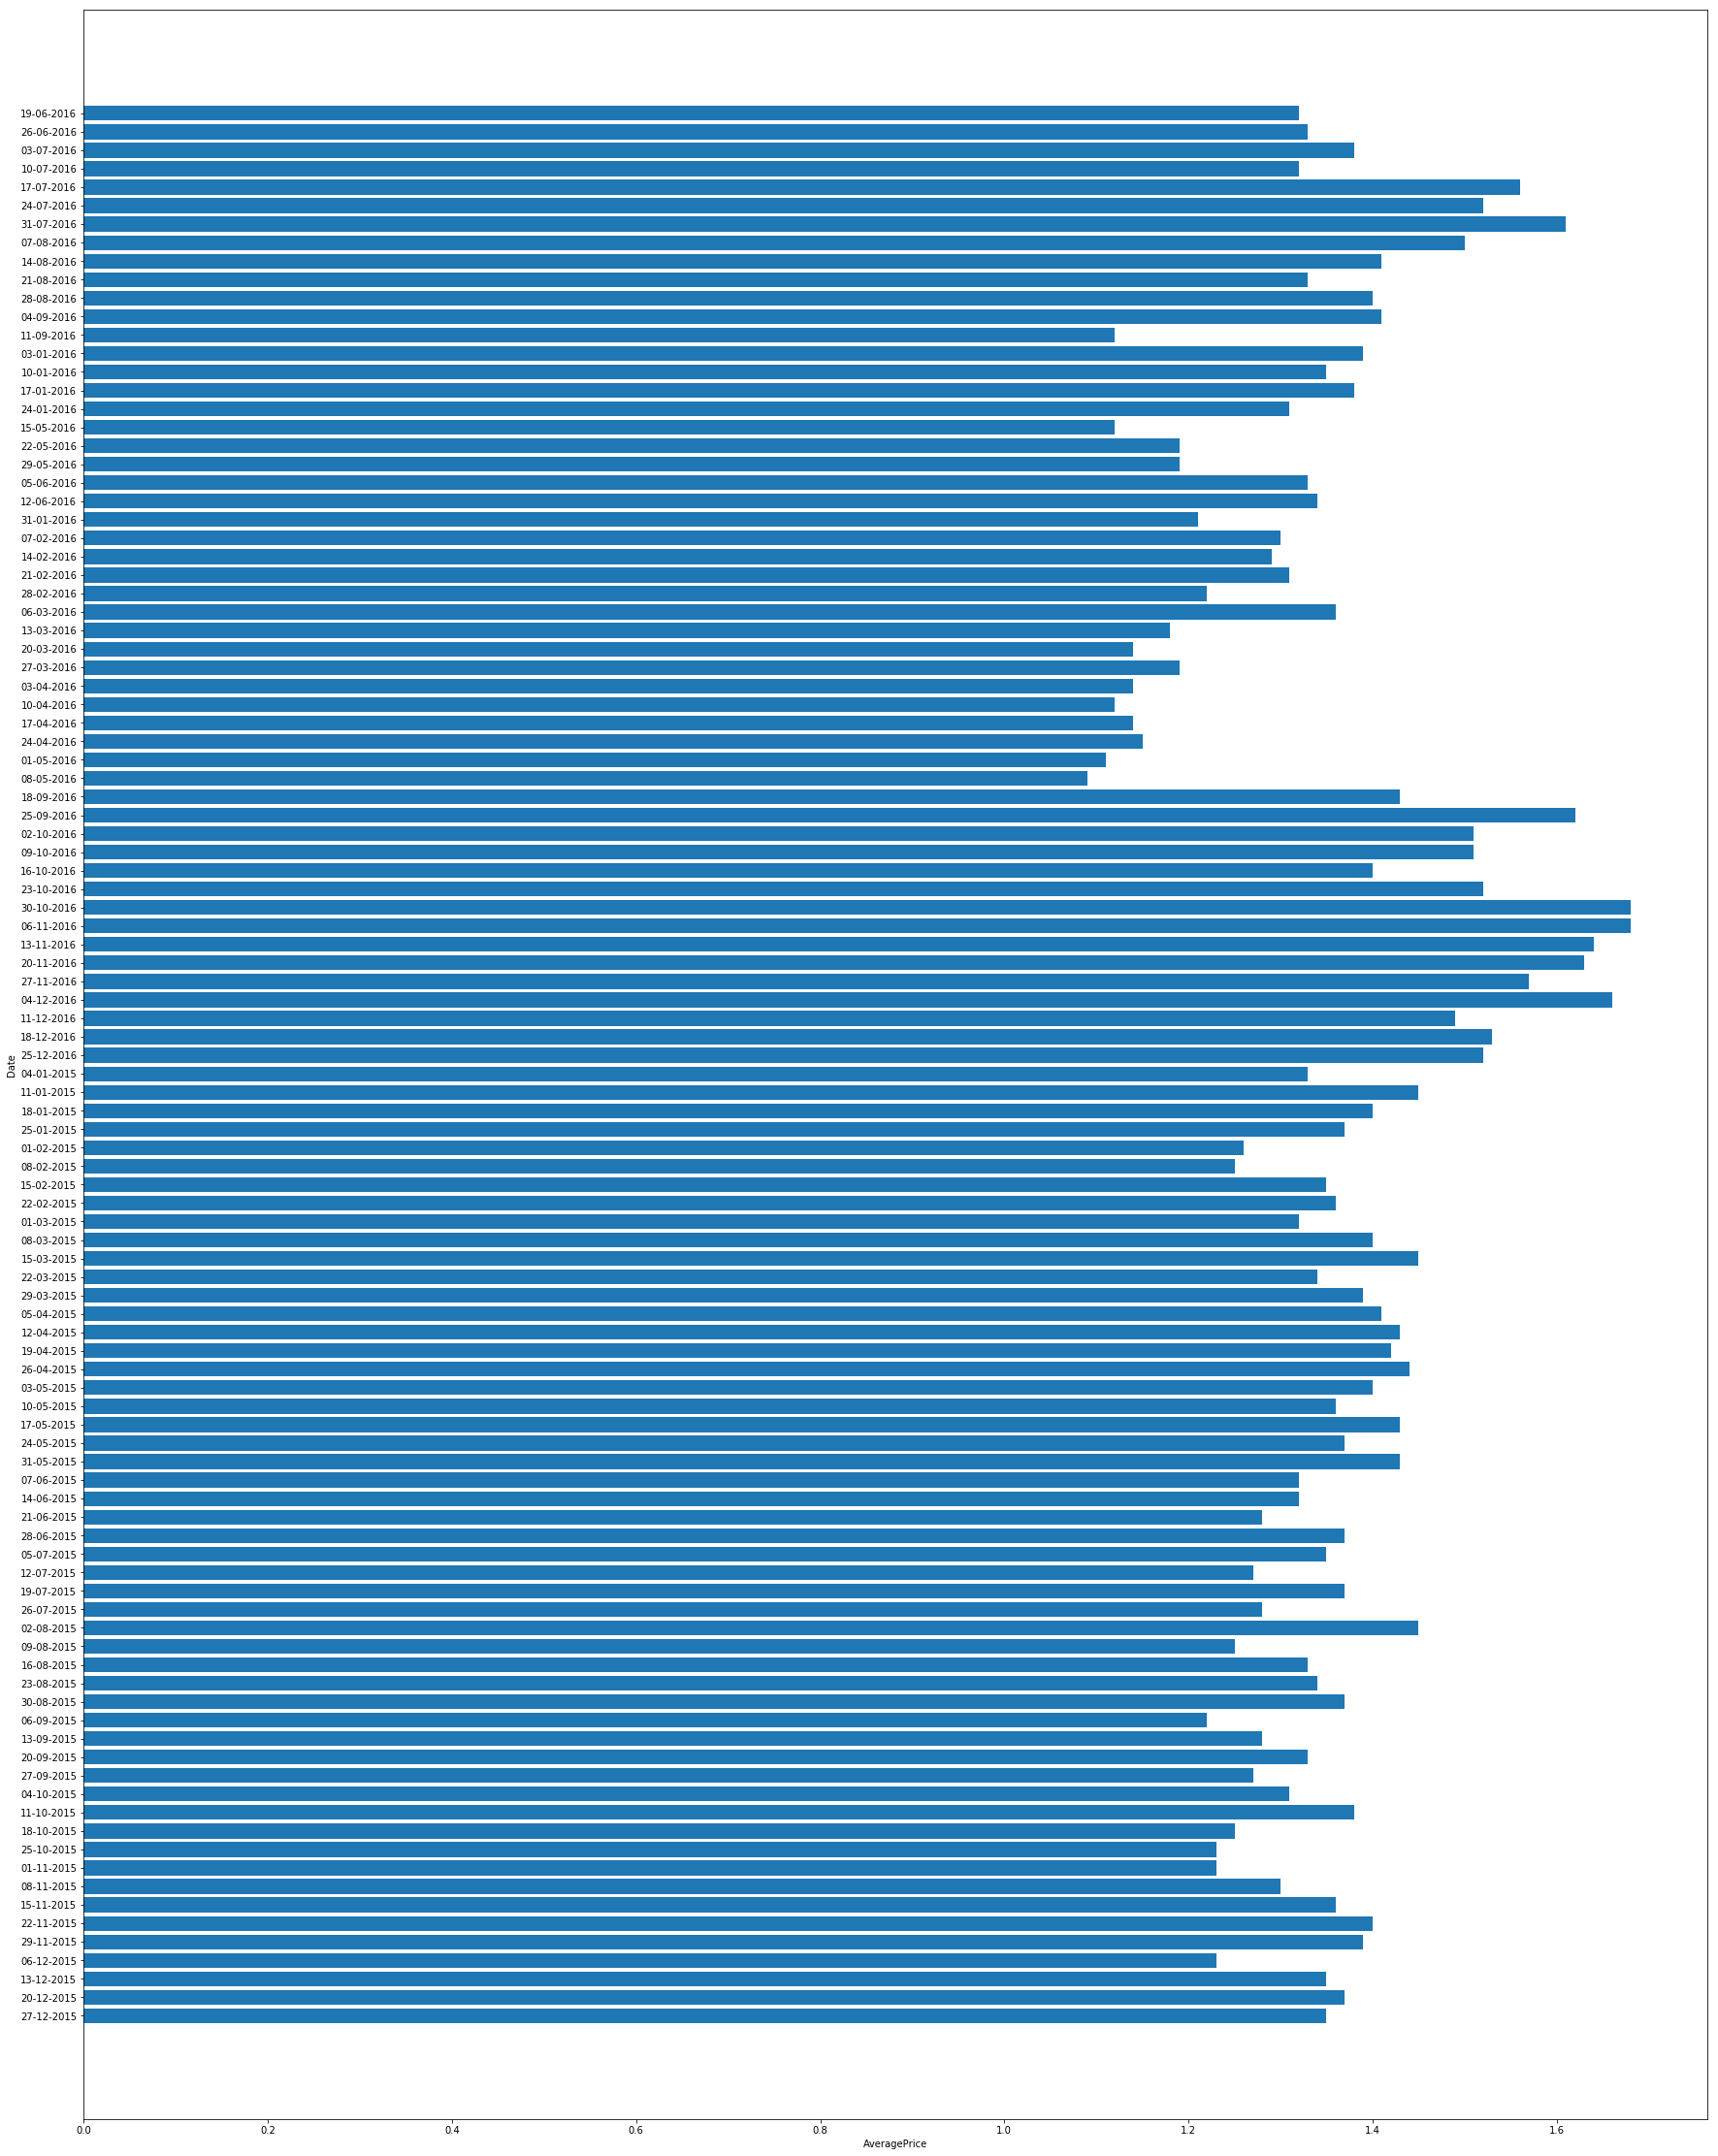

In [6]:
plt.figure(figsize = (30, 40)) 
plt.xlabel('AveragePrice')
plt.ylabel('Date')
plt.barh(df['Date'],df['AveragePrice'])

# -->Therefore we can see that on 30/10/2016 and 06/11/2016, avocado's average price was highest.
    

# And avocado's lowest average price was on 08/5/2016

<BarContainer object of 1517 artists>

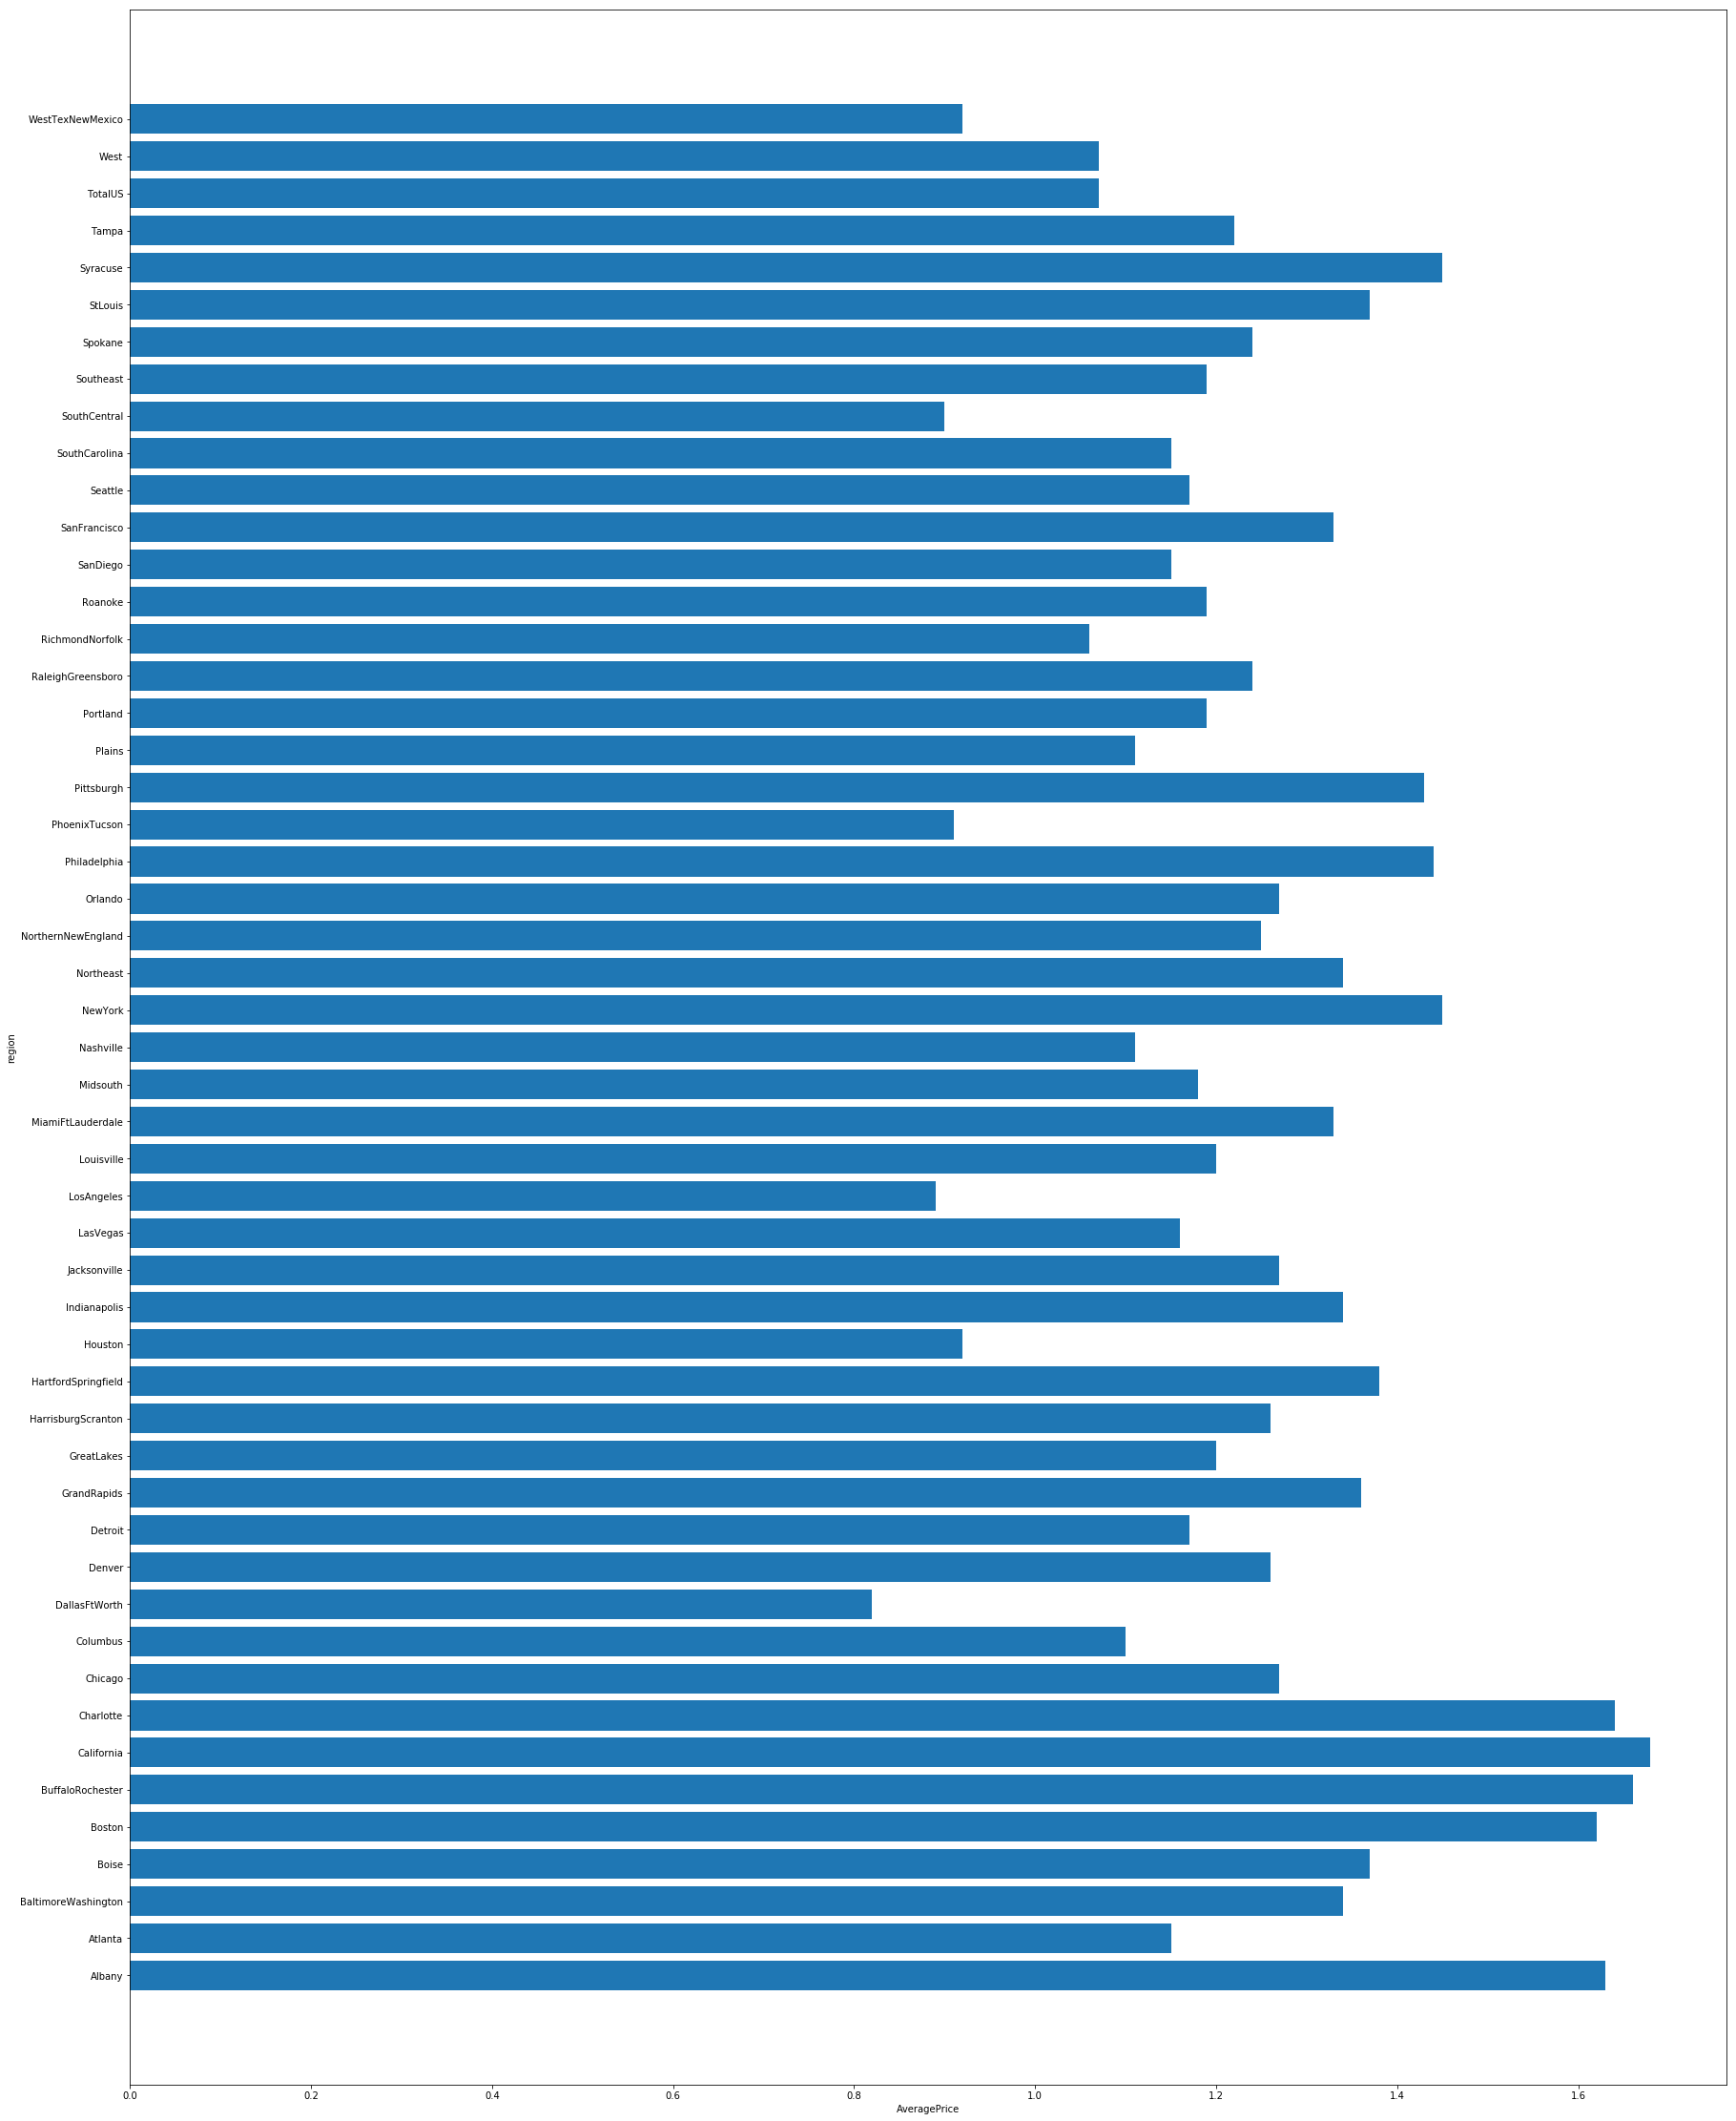

In [7]:
plt.figure(figsize = (30, 40)) 
plt.xlabel('AveragePrice')
plt.ylabel('region')
plt.barh(df['region'],df['AveragePrice'])

# We can observe that California is having highest average price among all other regions.


We can observe that DallasFtWorth is having lowest average price among all other regions.

In [8]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

Here we can observe that california is occuring maximum times as compared to others. 

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston

In [9]:
#Checking for Null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

THERE ARE NO NULL VALUES

C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x1440 with 0 Axes>

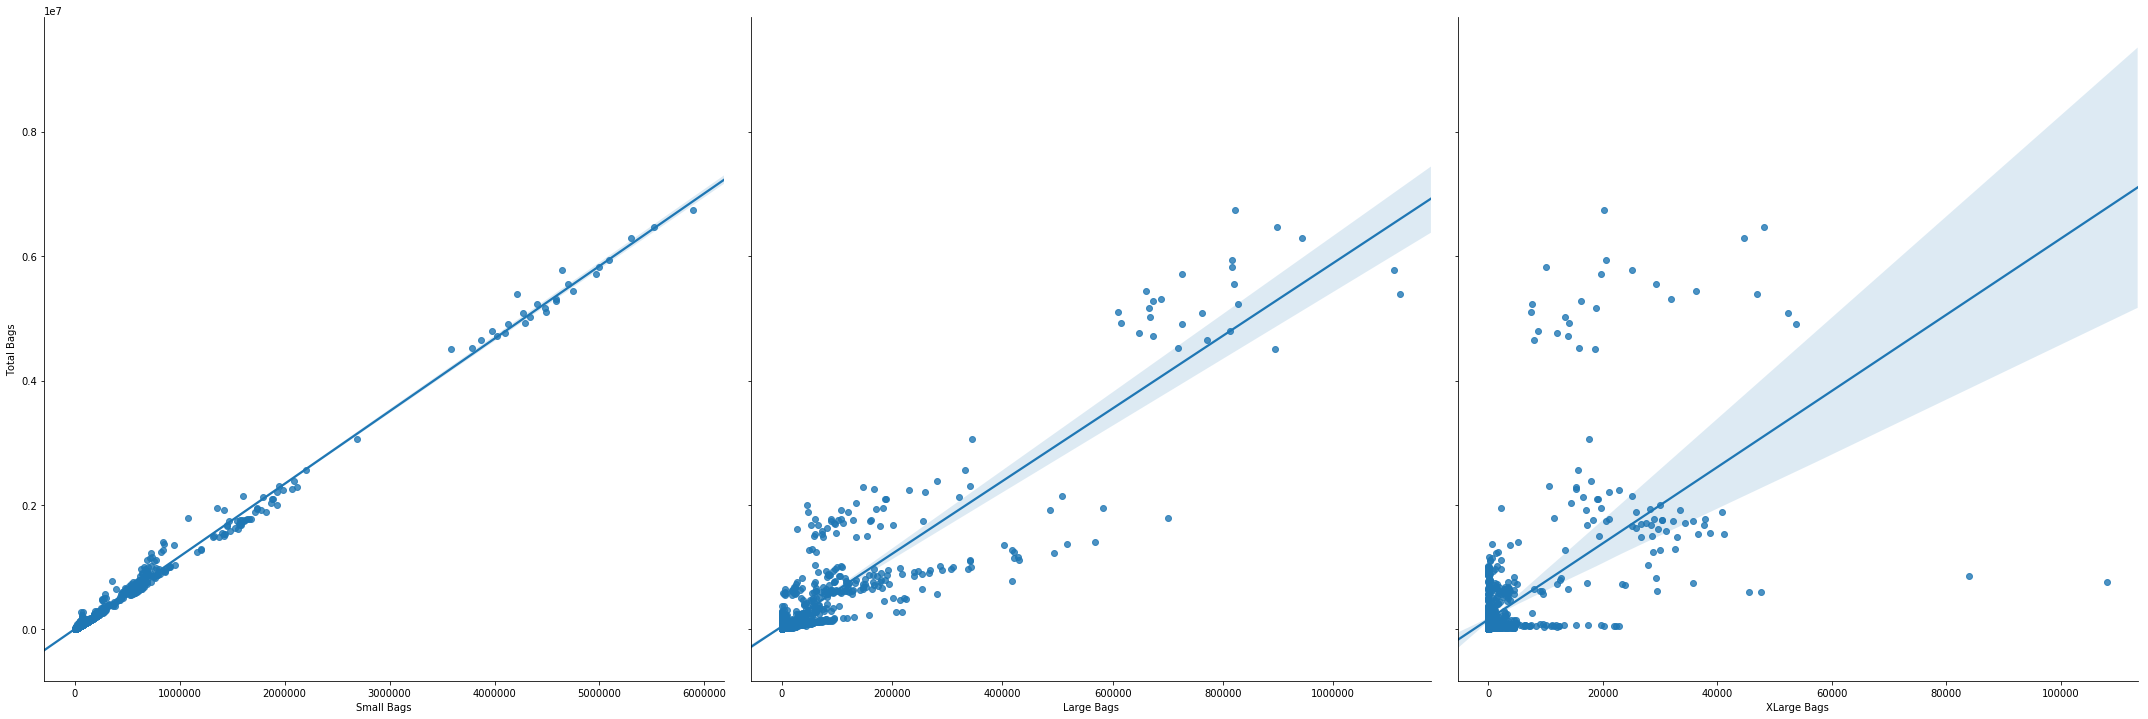

In [10]:
plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags',height=10, kind='reg')

# We see that there is strong +correlation with between Total Bags & SMALL BAGS.

In [11]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


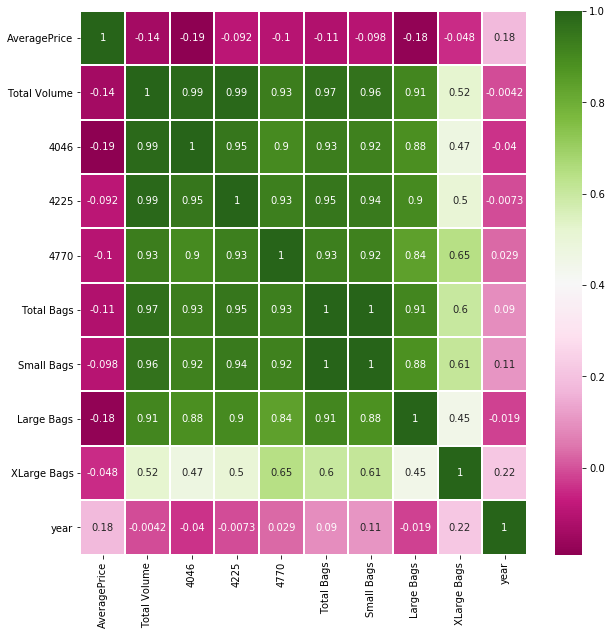

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True,cmap='PiYG',lw=1)

# There is no strong +ve correlation between average price and other features

# Average price is having -Ve correlation with 4046 & Large bags

There is strong +ve correlation between TOTAL VOLUME & PLU(4046,4225,4770)
And there is strong +ve correlation between TOTAL Bags & Small Bags,Large bags

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


# -->XLarge Bags is having highest std.deviation

-->minimum avg. price=0.490000
-->Maximum avg. price=1.680000



# -->Mean avg.price=1.074990

In [14]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [15]:
from scipy.stats import boxcox

In [16]:
list=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in list:
    df[i].replace(0,df[i].mean(axis=0),inplace=True)

In [17]:
for i in list:
    df[i],l=boxcox(df[i])

C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\RK\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


In [18]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.000000
4046           -0.012074
4225            0.008443
4770           -0.033389
Total Bags      0.005197
Small Bags      0.027623
Large Bags     -0.032179
XLarge Bags     0.046757
year            1.828332
dtype: float64

# Hence, we have successfully removed skewness from our data.

In [19]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [20]:
df['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

# therefore we will drop column 'type' as all our "conventional"

In [21]:
df.drop('type',axis=1,inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['year'] = le.fit_transform(df['year'])
df['region']=le.fit_transform(df['region'])

In [23]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,0.132857,7.697116,8.751395,4.372460,4.639014,4.387681,5.761985,18.446672,0,0
1,20-12-2015,1.35,0.132857,7.173622,8.625069,4.616744,4.658059,4.404202,5.832659,18.446672,0,0
2,13-12-2015,0.93,0.132857,7.372805,9.185122,5.675393,4.624796,4.375026,5.922663,18.446672,0,0
3,06-12-2015,1.08,0.132857,7.804897,8.926923,4.898957,4.548966,4.307146,6.344712,18.446672,0,0
4,29-11-2015,1.28,0.132857,7.579257,8.613518,4.955111,4.563256,4.317757,7.000295,18.446672,0,0


In [24]:
df['Date']=le.fit_transform(df['Date'])

In [25]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,92,1.33,0.132857,7.697116,8.751395,4.372460,4.639014,4.387681,5.761985,18.446672,0,0
1,68,1.35,0.132857,7.173622,8.625069,4.616744,4.658059,4.404202,5.832659,18.446672,0,0
2,44,0.93,0.132857,7.372805,9.185122,5.675393,4.624796,4.375026,5.922663,18.446672,0,0
3,20,1.08,0.132857,7.804897,8.926923,4.898957,4.548966,4.307146,6.344712,18.446672,0,0
4,98,1.28,0.132857,7.579257,8.613518,4.955111,4.563256,4.317757,7.000295,18.446672,0,0


# We have converted the Categorical data into numerical data for further processing.

# MODEL TRAINING

In [26]:
df_x=df.drop('AveragePrice',axis=1)

In [27]:
y=df['AveragePrice']

In [28]:
df_x.shape

(1517, 11)

In [29]:
y.shape

(1517,)

In [30]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [32]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (1061, 11)
y_train: (1061,)
x_test: (456, 11)
y_test: (456,)


In [33]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [34]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),SVR(),KNeighborsRegressor(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('**********************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is:
Score: [0.09836667 0.09640746 0.25006268 0.07922475]
Mean Score: 0.13101539030615755
standard deviation: 0.0691342452398526
**********************************************************************************************************




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is:
Score: [0.03946403 0.02786802 0.38484393 0.11994395]
Mean Score: 0.14302998030545702
standard deviation: 0.14404437990470495
**********************************************************************************************************


Score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is:
Score: [-0.48299511 -0.20696181  0.05406277  0.26028135]
Mean Score: -0.09390319831324168
standard deviation: 0.2790678175250205
**********************************************************************************************************


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) is:
Score: [0.09401172 0.09631024 0.2513

# SVR is most suitable, now we will check for the best parameter for our model

In [35]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':['rbf','linear','poly']}
clf=GridSearchCV(svr,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change

{'kernel': 'rbf'}

In [36]:
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.757009845232054

In [37]:
pred=svr.predict(x_test)

In [38]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Square error:',mean_squared_error(y_test,pred))
print('R2 Score:',r2_score(y_test,pred))

Mean Absolute error: 0.07975589054980803
Mean Square error: 0.01044388176829941
R2 Score: 0.7206485296507776


# Therefore the best suitable algorithm is SVR

In [39]:
#Now we will try to achieve better R2 Score with Ensembling Technique
from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor()
rfc.fit(x_train, y_train)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
pred1=rfc.predict(x_test)

In [41]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred1))
print('Mean Square error:',mean_squared_error(y_test,pred1))
print('R2 Score:',r2_score(y_test,pred1))

Mean Absolute error: 0.062008771929824555
Mean Square error: 0.007664399122807018
R2 Score: 0.7949937377883528


# Therefore we have enhanced our R2 score by Ensembling Technique.

In [42]:
from sklearn.externals import joblib
joblib.dump(rfc,'Avocado.pkl')

['Avocado.pkl']

# Hence we have saved the best model

# *************************REGION CLASSIFICATION***********************************************

In [43]:
#Importing all the required algorithms:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# SEPARATING X & Y for the MODEL Training

In [44]:
df_x1=df.iloc[:,0:-1]

In [45]:
df_x1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,92,1.33,0.132857,7.697116,8.751395,4.372460,4.639014,4.387681,5.761985,18.446672,0
1,68,1.35,0.132857,7.173622,8.625069,4.616744,4.658059,4.404202,5.832659,18.446672,0
2,44,0.93,0.132857,7.372805,9.185122,5.675393,4.624796,4.375026,5.922663,18.446672,0
3,20,1.08,0.132857,7.804897,8.926923,4.898957,4.548966,4.307146,6.344712,18.446672,0
4,98,1.28,0.132857,7.579257,8.613518,4.955111,4.563256,4.317757,7.000295,18.446672,0


In [46]:
y1=df['region']

In [47]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [48]:
df['region'].value_counts()

6     76
0     67
2     65
3     65
4     62
1     54
31    52
5     51
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
22    34
47    34
7     31
34    30
28    29
17    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
14    18
10    17
37    17
23    17
18    16
35    16
45    16
39    15
30    13
16    13
27    12
33    12
20    10
43     9
40     9
21     3
Name: region, dtype: int64

In [49]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(df_x1)
x1=pd.DataFrame(x1,columns=df_x1.columns)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
x1.shape

(1517, 11)

In [51]:
y1.shape

(1517,)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Selecting the best Algorithm for predicting REGION

In [53]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    score=cross_val_score(m,x1,y1,cv=4,scoring='accuracy')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('**********************************************************************************************************')
    print('\n')

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: Fut

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is:
Score: [0.5275     0.7075718  0.75603217 0.61772853]
Mean Score: 0.6522081262510762
standard deviation: 0.08744359341309219
**********************************************************************************************************




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will chang

Score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is:
Score: [0.645      0.79112272 0.89812332 0.7867036 ]
Mean Score: 0.7802374102273789
standard deviation: 0.08992572960209012
**********************************************************************************************************




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is:
Score: [0.6925     0.79373368 0.8766756  0.7700831 ]
Mean Score: 0.7832480967930935
standard deviation: 0.06566426080631421
**********************************************************************************************************




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


Score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') is:
Score: [0.67       0.80939948 0.84450402 0.77285319]
Mean Score: 0.7741891712125194
standard deviation: 0.06527080532209953
**********************************************************************************************************




# We observe that KNeighborClassifier is having highest mean accuracy : 78.32

In [54]:
#NOW WE WILL FIND THE BEST PARAMETER FOR OUR CLASSIFIER
from sklearn.model_selection import GridSearchCV
Knn=KNeighborsClassifier()
parameters={'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':[3,5,7,9,11]}
clf1=GridSearchCV(Knn,parameters)
clf1.fit(x1,y1)
clf1.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

# Therefore we have got the best parameters for our MODEL

In [55]:
Knn=KNeighborsClassifier( n_neighbors=3,weights='distance')

In [56]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30)
print('x1_train:',x1_train.shape)
print('y1_train:',y1_train.shape)
print('x1_test:',x1_test.shape)
print('y1_test:',y1_test.shape)
Knn.fit(x1_train,y1_train)
print(Knn.score(x1_train,y1_train))

x1_train: (1061, 11)
y1_train: (1061,)
x1_test: (456, 11)
y1_test: (456,)
1.0


In [57]:
pred1=Knn.predict(x1_test)

In [58]:
print('Accuracy Score:',accuracy_score(y1_test,pred1))
print('Classification report:',classification_report(y1_test,pred1))
print('Confusion matrix:',confusion_matrix(y1_test,pred1))

Accuracy Score: 0.8223684210526315
Classification report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.87      0.87      0.87        15
           2       0.80      1.00      0.89        20
           3       1.00      0.86      0.93        29
           4       1.00      0.95      0.98        21
           5       1.00      0.87      0.93        15
           6       1.00      0.95      0.98        21
           7       0.64      0.64      0.64        11
           8       0.86      0.86      0.86         7
           9       0.86      1.00      0.92        12
          10       0.80      1.00      0.89         4
          11       1.00      1.00      1.00         6
          12       1.00      0.90      0.95        10
          13       0.56      0.71      0.63         7
          14       0.80      0.80      0.80         5
          15       1.00      0.88      0.93         8
          16       0.67

# Therefore the best suitable algorithm is KNeighborsClassifier for REGION CLASSIFICATION

In [59]:
#USING ENSEMBLING TECHNIQUE TO GET BETTER ACCURACY SCORE THAN KNEIGHBOR CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf=RandomForestClassifier()

In [61]:
rf.fit(x1_train,y1_train)
print(rf.score(x1_train,y1_train))

0.9971724787935909


C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
pred2=rf.predict(x1_test)

In [63]:
print('Accuracy Score:',accuracy_score(y1_test,pred2))
print('Classification report:',classification_report(y1_test,pred2))
print('Confusion matrix:',confusion_matrix(y1_test,pred2))

Accuracy Score: 0.9166666666666666
Classification report:               precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.88      1.00      0.94        15
           2       0.91      1.00      0.95        20
           3       1.00      0.97      0.98        29
           4       1.00      0.90      0.95        21
           5       1.00      0.80      0.89        15
           6       1.00      0.95      0.98        21
           7       0.69      1.00      0.81        11
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        12
          10       1.00      0.75      0.86         4
          11       1.00      0.83      0.91         6
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         7
          14       0.83      1.00      0.91         5
          15       0.88      0.88      0.88         8
          16       1.00

# Therefore by using RANDOM FOREST TREE CLASSIFIER we are able to achieve 94.5% accuracy.

In [64]:
#NOW WE WILL SAVE OUR BEST MODEL FOR REGION CLASSIFICATION
from sklearn.externals import joblib
joblib.dump(rf,'Avocado1.pkl')

['Avocado1.pkl']